# Import Library

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import pickle

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

from __future__ import print_function
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Dropout,ZeroPadding2D,concatenate,AveragePooling2D,add
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.preprocessing import image
from keras import optimizers
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras import backend as K
#from vis.utils import utils
from keras import activations
#from vis.visualization import visualize_activation, get_num_filters
#from vis.input_modifiers import Jitter

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


# Functions

In [2]:
def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

def plot_compare(history, steps=-1):
    if steps < 0:
        steps = len(history.history['acc'])
    acc = smooth_curve(history.history['acc'][:steps])
    val_acc = smooth_curve(history.history['val_acc'][:steps])
    loss = smooth_curve(history.history['loss'][:steps])
    val_loss = smooth_curve(history.history['val_loss'][:steps])
    
    plt.figure(figsize=(6, 4))
    plt.plot(loss, c='#0c7cba', label='Train Loss')
    plt.plot(val_loss, c='#0f9d58', label='Val Loss')
    plt.xticks(range(0, len(loss), 5))
    plt.xlim(0, len(loss))
    plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
    plt.legend()
    
    plt.figure(figsize=(6, 4))
    plt.plot(acc, c='#0c7cba', label='Train Acc')
    plt.plot(val_acc, c='#0f9d58', label='Val Acc')
    plt.xticks(range(0, len(acc), 5))
    plt.xlim(0, len(acc))
    plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
    plt.legend()
    
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x
 
def save_history(history, fn):
    with open(fn, 'wb') as fw:
        pickle.dump(history.history, fw, protocol=2)

def load_history(fn):
    class Temp():
        pass
    history = Temp()
    with open(fn, 'rb') as fr:
        history.history = pickle.load(fr)
    return history

def jitter(img, amount=32):
    ox, oy = np.random.randint(-amount, amount+1, 2)
    return np.roll(np.roll(img, ox, -1), oy, -2), ox, oy

def reverse_jitter(img, ox, oy):
    return np.roll(np.roll(img, -ox, -1), -oy, -2)

def plot_image(img):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')

# Reference

In [5]:
# dimensions of our images.
img_width, img_height = 224, 224

train_data_dir = './data/train'
validation_data_dir = './data/validation'

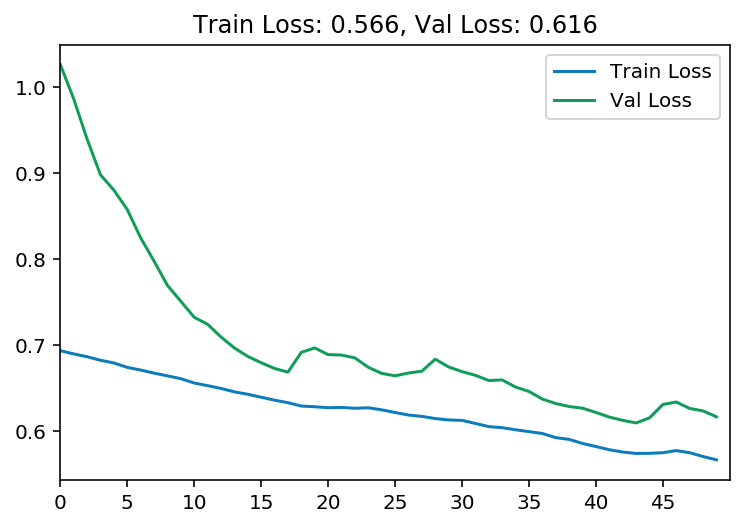

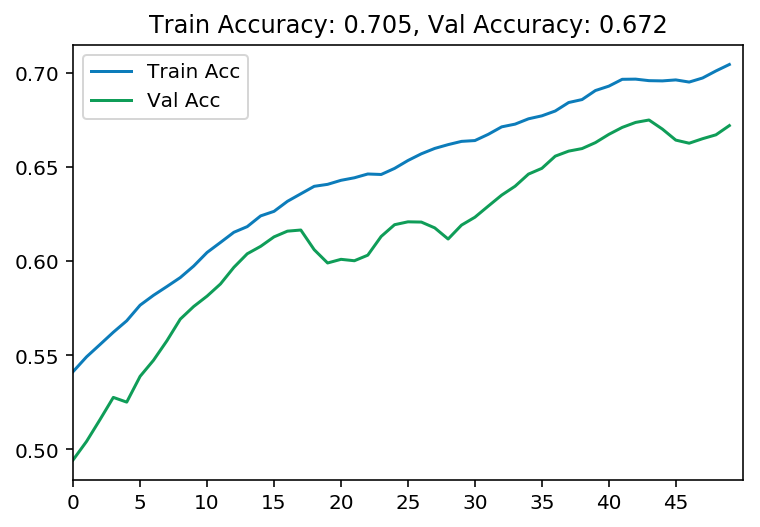

In [8]:
history = load_history('history_GoogLeNet_v3.bin')
plot_compare(history)

In [30]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 227, 227, 3)  0                                            
__________________________________________________________________________________________________
conv2d_185 (Conv2D)             (None, 114, 114, 64) 9472        input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_20 (BatchNo (None, 114, 114, 64) 456         conv2d_185[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_43 (MaxPooling2D) (None, 57, 57, 64)   0           batch_normalization_20[0][0]     
__________________________________________________________________________________________________
conv2d_186

In [9]:
model = load_model('model_GoogLeNet_v3.h5')

In [10]:

test_dir = './data/test'
final_test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = final_test_datagen.flow_from_directory( 
    test_dir, 
    target_size=(img_width, img_height),
    batch_size=batch_size, 
    class_mode='binary')

filenames = test_generator.filenames
nb_samples = len(filenames)
results = model.evaluate_generator( test_generator,  steps=30) 


Found 2000 images belonging to 2 classes.


In [11]:
print("test_loss: ",results[0])
print("test_accuracy: ",results[1])

test_loss:  0.60967611571153
test_accuracy:  0.7010416666666667
